###### python利用matplotlib读取并显示图片（还可以使用pillow或opencv等）

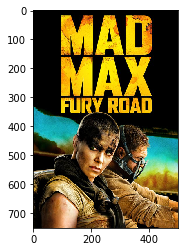

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

img = plt.imread('test.jpg') # img表示待处理的图像

plt.imshow(img) # plt.imshow()函数负责对图像进行处理，并显示其格式
plt.show() # plt.show()则是将plt.imshow()处理后的函数显示出来

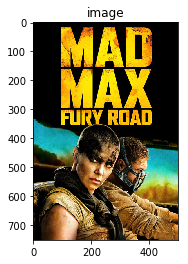

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('test.jpg')
#print(im.size)
#w,h = im.size
#print(h)
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为off
plt.title('image') # 图像题目
plt.show()

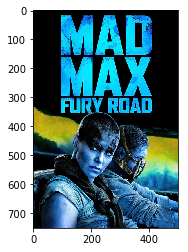

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

im = cv2.imread('test.jpg')
#cv2.imshow('mm', img) # cv2.imshow()与jupyter notebook不兼容
#cv2.imshow('显示窗口名称',图像数组)
#https://my.oschina.net/u/4070307/blog/3008278
#cv2.waitKey(0) # 运行cv2.imshow后，需要使用cv2.waitKey来保持窗口的显示
# 为了显示图像，官方文档中进行了说明，imshow后必须使用waitKey
# cv2.waitKey(delay) delay参数表示延迟多少毫秒。默认情况为0。
# 当delay≤0，可以理解为延迟无穷大毫秒，就是暂停了。
#cv2.destroyAllWindows()

plt.imshow(im)
plt.show()

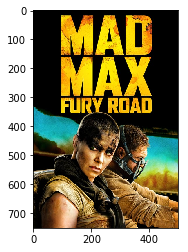

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('test.jpg')
img2 = img[:,:,::-1] # 若不处理，则颜色显示异常
plt.imshow(img2)
plt.show()

###### 最简单的爬虫

In [10]:
from urllib import request

In [30]:
response = request.urlopen('http://www.fanyi.baidu.com')

In [31]:
response

In [32]:
html = response.read() # html为二进制乱码

In [57]:
# 获取网页编码方式的方法
import chardet

charset = chardet.detect(html)
print(charset)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [54]:
html2 = html.decode("utf-8") # 通过简单的decode()命令将网页的信息进行解码，并显示出来

In [55]:
print(html2)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title>百度翻译</title>
<meta name="keywords" content="翻译,在线翻译,百度翻译,词典,英语,"/>
<meta name="description" content="百度翻译提供即时免费的多语种文本翻译和网页翻译服务，支持中、英、日、韩、泰、法、西、德等28种热门语言互译，覆盖756个翻译方向。"/>
<meta name="renderer" content="webkit">
<meta name="force-rendering" content="webkit">



<script>
    /* 配置需要统计的模块，以及整体的抽样率，不需要的模块不配置即可（可点击上面的模块名称自动隐藏） */
    window.alogObjectConfig = {
        sample: '1', // 配置整体的抽样率（下面各个统计模块的抽样是在此基础上进行的再抽样），https协议的网页必须配置(需要保证抽样后的PV控制在100万以内)，http的可以不配置（默认为1）
 
        product: '156',  // 必须, DP平台产品线id
        page: '156_1',  // 必须, DP平台页面id
        monkey_page: '',  // 如果页面已经有hunter平台的monkey，则为monkey的pageId, 否侧无需该字段
        speed_page: '',  // 如果页面已经有webspeed平台的性能监控，则为性能的page_id,否侧无需该字段
 
        // 性能----------------------------------------------------------------------------------
        speed: {
            sample: '0.2'   // 抽样率, 0~1，建议使采样的pv控制在100万以内，必须

In [71]:
print(response.info()) 
# info()返回的是一些meta标记的元信息，包括一些服务器的信息

Content-Type: text/html; charset=UTF-8
Date: Sun, 23 Feb 2020 04:47:42 GMT
P3p: CP=" OTI DSP COR IVA OUR IND COM "
Server: yunjiasu
Set-Cookie: BAIDUID=EB6C691E2ADC153056A5697C4CDAB7A1:FG=1; expires=Mon, 22-Feb-21 04:47:42 GMT; max-age=31536000; path=/; domain=.baidu.com; version=1
Tracecode: 28620751472493637386022312
Vary: Accept-Encoding
Yjs-Id: 8a8a804cc2092d59-116
Connection: close
Transfer-Encoding: chunked




In [72]:
print(response.geturl()) # geturl()返回的是一个url的字符串

https://fanyi.baidu.com/


In [73]:
print(response.getcode()) 
# getcode()返回的是HTTP的状态码，如果返回200表示请求成功

200


###### 网络小说下载（静态网站）

In [81]:
import requests
from bs4 import BeautifulSoup

In [98]:
target = 'http://www.biqukan.com/1_1094/5403177.html'
req = requests.get(url=target)

In [105]:
req.encoding

'ISO-8859-1'

In [106]:
type(req.text)

str

In [108]:
type(req.content)

bytes

In [109]:
req.apparent_encoding

'GB2312'

In [110]:
chardet.detect(req.content)

{'confidence': 0.99, 'encoding': 'GB2312', 'language': 'Chinese'}

In [113]:
req.headers

{'Server': 'nginx', 'Date': 'Tue, 18 Feb 2020 06:22:09 GMT', 'Content-Type': 'text/html', 'Last-Modified': 'Fri, 17 Jan 2020 08:31:29 GMT', 'Transfer-Encoding': 'chunked', 'ETag': 'W/"5e2170e1-38ce"', 'Content-Encoding': 'gzip', 'X-Via': '1.1 172-16-0-53 (random:578111 Fikker/Webcache/3.8.0)', 'Connection': 'keep-alive'}

In [114]:
# Python3 利用requests抓取网页源码中文乱码问题（由gb2312编码引起）
# 将原文件转码成latin1编码（使用encode函数）再解码成gbk编码（使用decode函数
# 即可输出正确中文
html = req.text.encode('latin1').decode('gbk')
print(html)

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gbk" />
<title>第一章 他叫白小纯_一念永恒_修真小说_笔趣阁</title>
<meta name="keywords" content="一念永恒, 第一章 他叫白小纯" />
<meta name="description" content="笔趣阁提供了耳根创作的修真小说《一念永恒》干净清爽无错字的文字章节：第一章 他叫白小纯在线阅读。" />
<meta http-equiv="Cache-Control" content="no-transform" />
<meta http-equiv="Cache-Control" content="no-siteapp" />
<meta http-equiv="mobile-agent" content="format=html5; url=https://wap.biqukan.com/1/1094/5403177.html" />
<meta http-equiv="mobile-agent" content="format=xhtml; url=https://wap.biqukan.com/1/1094/5403177.html" />
<link href="/css/style.css" rel="stylesheet" type="text/css" />
<script src="https://apps.bdimg.com/libs/jquery/1.8.3/jquery.min.js"></script>
<script src="/xxgg/common.js"></script>
<script src="/xxgg/read.js"></script>
<script type="text/javascript">
var preview_page = "/1_1094/5386268.html";
var next_page = "/1_1094/5428081.html";
var index_page = "/1_1094/";
function jumpPage() {
  if (ev

In [148]:
html = req.text.encode('latin1').decode('gbk')
bf = BeautifulSoup(html, "html5lib")
# 文章的所有内容都放在了一个名为div的“东西下面”，这个"东西"就是html标签
# class属性为showtxt的div标签里面存放的内容，是我们关心的正文部分
# <div id="content", class="showtxt">
texts = bf.find_all('div',class_ = 'showtxt')
print(texts)

[<div class="showtxt" id="content"><script>app2();</script><br/>        帽儿山，位于东林山脉中，山下有一个村子，民风淳朴，以耕田为生，与世隔绝。
<br/>
<br/>        清晨，村庄的大门前，整个村子里的乡亲，正为一个十五六岁少年送别，这少年瘦弱，但却白白净净，看起来很是乖巧，衣着尽管是寻常的青衫，可却洗的泛白，穿在这少年的身上，与他目中的纯净搭配在一起，透出一股子灵动。
<br/>
<br/>        他叫白小纯。
<br/>
<br/>        “父老乡亲们，我要去修仙了，可我舍不得你们啊。”少年满脸不舍，原本就乖巧的样子，此刻看起来更为纯朴。
<br/>
<br/>        四周的乡亲，面面相觑，顿时摆出难舍之色。
<br/>
<br/>        “小纯，你爹娘走的早，你是个……好孩子！！难道你不想长生了么，成为仙人就可以长生，能活的很久很久，走吧，雏鹰长大，总有飞出去的那一天。”人群内走出一个头发花白的老者，说道好孩子三个字时，他顿了一下。
<br/>
<br/>        “在外面遇到任何事情，都要坚持下去，走出村子，就不要回来，因为你的路在前方！”老人神色慈祥，拍了拍少年的肩膀。
<br/>
<br/>        “长生……”白小纯身体一震，目中慢慢坚定起来，在老者以及四周乡亲鼓励的目光下，他重重的点了点头，深深的看了一眼四周的乡亲，转身迈着大步，渐渐走出了村子。
<br/>
<br/>        眼看少年的身影远去，村中的众人，一个个都激动起来，目中的难舍刹那就被喜悦代替，那之前满脸慈祥的老者，此刻也在颤抖，眼中流下泪水。
<br/>
<br/>        “苍天有眼，这白鼠狼，他终于……终于走了，是谁告诉他在附近看到仙人的，你为村子立下了大功！”
<br/>
<br/>        “这白鼠狼终于肯离开了，可怜我家的几只鸡，就因为这白鼠狼怕鸡打鸣，不知用了什么方法，唆使一群孩子吃鸡肉，把全村的鸡都给吃的干干净净……”
<br/>
<br/>        “今天过年了！”欢呼之声，立刻在这不大的村子里，沸腾而起，甚至有人拿出了锣鼓，高兴的敲打起来。
<br/>
<br/>        村子外，白小纯还没等走远，他就听到了身后

In [146]:
# 获得了第一个章节的内容
print(texts[0].text.replace('\xa0'*8,'').replace('app2();',''))

帽儿山，位于东林山脉中，山下有一个村子，民风淳朴，以耕田为生，与世隔绝。

清晨，村庄的大门前，整个村子里的乡亲，正为一个十五六岁少年送别，这少年瘦弱，但却白白净净，看起来很是乖巧，衣着尽管是寻常的青衫，可却洗的泛白，穿在这少年的身上，与他目中的纯净搭配在一起，透出一股子灵动。

他叫白小纯。

“父老乡亲们，我要去修仙了，可我舍不得你们啊。”少年满脸不舍，原本就乖巧的样子，此刻看起来更为纯朴。

四周的乡亲，面面相觑，顿时摆出难舍之色。

“小纯，你爹娘走的早，你是个……好孩子！！难道你不想长生了么，成为仙人就可以长生，能活的很久很久，走吧，雏鹰长大，总有飞出去的那一天。”人群内走出一个头发花白的老者，说道好孩子三个字时，他顿了一下。

“在外面遇到任何事情，都要坚持下去，走出村子，就不要回来，因为你的路在前方！”老人神色慈祥，拍了拍少年的肩膀。

“长生……”白小纯身体一震，目中慢慢坚定起来，在老者以及四周乡亲鼓励的目光下，他重重的点了点头，深深的看了一眼四周的乡亲，转身迈着大步，渐渐走出了村子。

眼看少年的身影远去，村中的众人，一个个都激动起来，目中的难舍刹那就被喜悦代替，那之前满脸慈祥的老者，此刻也在颤抖，眼中流下泪水。

“苍天有眼，这白鼠狼，他终于……终于走了，是谁告诉他在附近看到仙人的，你为村子立下了大功！”

“这白鼠狼终于肯离开了，可怜我家的几只鸡，就因为这白鼠狼怕鸡打鸣，不知用了什么方法，唆使一群孩子吃鸡肉，把全村的鸡都给吃的干干净净……”

“今天过年了！”欢呼之声，立刻在这不大的村子里，沸腾而起，甚至有人拿出了锣鼓，高兴的敲打起来。

村子外，白小纯还没等走远，他就听到了身后村子内，传出了敲锣打鼓的声音，还夹着欢呼。

白小纯脚步一顿，神色有些古怪，干咳一声，伴随着耳边传来的锣鼓，白小纯顺着山路，走上了帽儿山。

这帽儿山虽不高，却灌木杂多，虽是清晨，可看起来也是黑压压一片，很是安静。

“听二狗说，他前几天在这里被一头野猪追赶时，看到天上有仙人飞过……”白小纯走在山路上，心脏怦怦跳动时，忽然一旁的灌林中传来阵阵哗哗声，似野猪一样，这声音来的突然，让本就紧张的白小纯，顿时背后发凉。

“谁，谁在那里！”白小纯右手快速从行囊中拿出四把斧头，六把柴刀，还觉得不放心，又从怀里取出了一小根黑色的香，死死的抓住。

“别出来，千万别出来，我有斧头，有

In [161]:
# 通过审查元素，可以发现，章节都存放在了class属性为listmain的div标签下
# 每个章节的名字存放在了<a>标签里面。<a>标签还有一个href属性。这里就不得
# 不提一下<a>标签的定义了，<a>标签定义了一个超链接，用于从一张页面链接到
# 另一张页面。<a> 标签最重要的属性是 href 属性，它指示链接的目标
# 将之前获得的第一章节的URL和<a> 标签对比看一下：
# http://www.biqukan.com/1_1094/5403177.html
# <a href="/1_1094/5403177.html">第一章 他叫白小纯</a>
# <a> 标签中href属性存放的属性值/1_1094/5403177.html是章
# 节URLhttp://www.biqukan.com/1_1094/5403177.html的后半部分。
# 小说每章的链接放在了class属性为listmain的<div>标签下的<a>标签中。
# 链接具体位置放在html->body->div->dl->dd->a的href属性中。先匹
# 配class属性为listmain的<div>标签，再匹配<a>标签。
import requests
from bs4 import BeautifulSoup

server = 'http://www.biqukan.com/'
target = 'http://www.biqukan.com/1_1094/'
req = requests.get(url=target)

In [154]:
html = req.text.encode('latin1').decode('gbk')
div_bf = BeautifulSoup(html, "html5lib")
div = div_bf.find_all('div',class_ = 'listmain')
print(div[0])

<div class="listmain">
	<dl>

		<dt>《一念永恒》最新章节列表</dt>
		<dd><a href="/1_1094/22744709.html">《三寸人间》上架啦，已40万字，可以开宰啦~~</a></dd>
		<dd><a href="/1_1094/22744708.html">新书《三寸人间》发布！！！求收藏！！</a></dd>
		<dd><a href="/1_1094/17967679.html">第1314章 你的选择（终）</a></dd>
		<dd><a href="/1_1094/17967303.html">第1313章 青灯古庙伴一生</a></dd>
		<dd><a href="/1_1094/17964263.html">第1312章 左岸</a></dd>
		<dd><a href="/1_1094/17956049.html">第1311章 一念，永恒</a></dd>
		<dd><a href="/1_1094/17953054.html">第1310章 念起天劫现</a></dd>
		<dd><a href="/1_1094/17942081.html">第1309章 见神</a></dd>
		<dd><a href="/1_1094/17939510.html">第1308章 引导与开启</a></dd>
		<dd><a href="/1_1094/17930894.html">第1307章 起源</a></dd>
		<dd><a href="/1_1094/17927946.html">第1306章 罗天无情</a></dd>
		<dd><a href="/1_1094/17918892.html">第1305章 逆陨</a></dd>
		<dt>《一念永恒》正文卷</dt>
		<dd><a href="/1_1094/5386268.html">章节目录</a></dd>
		<dd><a href="/1_1094/5403177.html">第一章 他叫白小纯</a></dd>
		<dd><a href="/1_1094/5428081.html">第二章 火灶房</a></dd>
		<dd><a href="/1_1094/5433843.html"

In [162]:
# 接下来再匹配每一个<a>标签，并提取章节名和章节文章
# <a href="/1_1094/5403177.html">第一章 他叫白小纯</a>
a_bf = BeautifulSoup(str(div[0]), "html5lib")
a = a_bf.find_all('a')
for each in a:
    print(each.string,server + each.get('href'))

《三寸人间》上架啦，已40万字，可以开宰啦~~ http://www.biqukan.com//1_1094/22744709.html
新书《三寸人间》发布！！！求收藏！！ http://www.biqukan.com//1_1094/22744708.html
第1314章 你的选择（终） http://www.biqukan.com//1_1094/17967679.html
第1313章 青灯古庙伴一生 http://www.biqukan.com//1_1094/17967303.html
第1312章 左岸 http://www.biqukan.com//1_1094/17964263.html
第1311章 一念，永恒 http://www.biqukan.com//1_1094/17956049.html
第1310章 念起天劫现 http://www.biqukan.com//1_1094/17953054.html
第1309章 见神 http://www.biqukan.com//1_1094/17942081.html
第1308章 引导与开启 http://www.biqukan.com//1_1094/17939510.html
第1307章 起源 http://www.biqukan.com//1_1094/17930894.html
第1306章 罗天无情 http://www.biqukan.com//1_1094/17927946.html
第1305章 逆陨 http://www.biqukan.com//1_1094/17918892.html
章节目录 http://www.biqukan.com//1_1094/5386268.html
第一章 他叫白小纯 http://www.biqukan.com//1_1094/5403177.html
第二章 火灶房 http://www.biqukan.com//1_1094/5428081.html
第三章 六句真言 http://www.biqukan.com//1_1094/5433843.html
第四章 炼灵 http://www.biqukan.com//1_1094/5447905.html
第五章 万一丢了小命咋办 http://www.biqukan.com//

第426章 不正经的桥 http://www.biqukan.com//1_1094/8030286.html
第427章 欺负人啊！ http://www.biqukan.com//1_1094/8039680.html
第428章 你们不用劝我了！ http://www.biqukan.com//1_1094/8064054.html
第429章 人与山融 http://www.biqukan.com//1_1094/8071994.html
第430章 我也能！ http://www.biqukan.com//1_1094/8094240.html
第431章 主人，你放过我吧！ http://www.biqukan.com//1_1094/8101570.html
第432章 急火攻心！ http://www.biqukan.com//1_1094/8120710.html
第433章 六个时辰 http://www.biqukan.com//1_1094/8127404.html
第434章 重闯星空榜！ http://www.biqukan.com//1_1094/8145503.html
第435章 聚魂丹威！ http://www.biqukan.com//1_1094/8151963.html
第436章 战公孙婉儿！ http://www.biqukan.com//1_1094/8170317.html
第437章 国度裂塑！ http://www.biqukan.com//1_1094/8174957.html
第438章 修为突破！ http://www.biqukan.com//1_1094/8177300.html
第439章 我只有一个愿望 http://www.biqukan.com//1_1094/8188676.html
第440章 非同寻常的逆河宗 http://www.biqukan.com//1_1094/8193303.html
第441章 猎魂试炼 http://www.biqukan.com//1_1094/8208318.html
第442章 杜凌菲现身！ http://www.biqukan.com//1_1094/8213108.html
第443章 登船 http://www.biqukan.com//1_10

第1275章 肉身太古！ http://www.biqukan.com//1_1094/17688592.html
第1276章 苏醒！ http://www.biqukan.com//1_1094/17716294.html
第1277章 反之，亦主宰！ http://www.biqukan.com//1_1094/17729617.html
第1278章 通天再现 http://www.biqukan.com//1_1094/17732007.html
第1279章 逆凡门徒 http://www.biqukan.com//1_1094/17743938.html
第1280章 啃一口…… http://www.biqukan.com//1_1094/17747241.html
第1281章 往昔 http://www.biqukan.com//1_1094/17756926.html
第1282章 传奇人生 http://www.biqukan.com//1_1094/17760726.html
第1283章 白小纯的道 http://www.biqukan.com//1_1094/17770941.html
第1284章 星星之火 http://www.biqukan.com//1_1094/17774592.html
第1285章 圣皇出关 http://www.biqukan.com//1_1094/17784863.html
第1286章 宋缺！ http://www.biqukan.com//1_1094/17787850.html
第1287章 枭雄 http://www.biqukan.com//1_1094/17801374.html
第1288章 永恒之眼 http://www.biqukan.com//1_1094/17803992.html
第1289章 苦战 http://www.biqukan.com//1_1094/17814051.html
第1290章 值得吗 http://www.biqukan.com//1_1094/17817978.html
第1291章 逆凡苏醒！ http://www.biqukan.com//1_1094/17827463.html
第1292章 半宙道身！ http://www.biqukan.c

In [163]:
# 每个章节的链接、章节名、章节内容都有了。接下来就是整合代码，将获得内容写入
# 文本文件存储就好了

###### 优美壁纸下载（动态网站）

In [166]:
# 每个html标签都有各自的功能。<a>标签存放超链接，html规定图片存放在<img>标签中
# <img alt="Snow-capped mountain slopes under blue sky" 
# src="https://images.unsplash.com/photo-1428509774491
# -cfac96e12253?dpr=1&amp;auto=compress,format&amp;
# fit=crop&amp;w=360&amp;h=240&amp;q=80&amp;cs=tinysrgb&amp;
# crop=" class="cV68d" style="width: 220px; height: 147px;">
# <img>标签有很多属性，有alt、src、class、style属性，其中src属性存放的
# 就是我们需要的图片保存地址，我们根据这个地址就可以进行图片的下载
# 1.使用requeusts获取整个网页的HTML信息；
# 2.使用Beautiful Soup解析HTML信息，找到所有<img>标签，提取src属性，
#   获取图片存放地址；
# 3.根据图片存放地址，下载图片
import requests
target = 'https://unsplash.com'
req = requests.get(url=target)

In [168]:
# 按照设想，我们应该能找到很多<img>标签。但是我们发现，除了一些<script>标签和
# 一些看不懂的代码之外，我们一无所获，一个<img>标签都没有,这是因为这个网站的所有
# 图片都是动态加载的，网站有静态网站和动态网站之分，上一个实战爬取的网站是静态网
# 站，而这个网站是动态网站，动态加载有一部分的目的就是为了反爬虫
print(req.text)

<!doctype html>
<html lang="en"><head><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta name="apple-itunes-app" content="app-id=1290631746"/><link rel="preconnect" href="https://images.unsplash.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://cdn4.buysellads.net"/><link rel="preconnect" href="https://ad.doubleclick.net"/><link rel="preconnect" href="https://logger.unsplash.com"/><link rel="preconnect" href="https://sb.scorecardresearch.com"/><link type="application/opensearchdescription+xml" rel="search" href="/a/opensearch.xml"/><style data-href="/a/main.aae8b.css">._3XJBh{opacity:.8;transition:opacity .1s ease-in-out}._3XJBh:focus,._3XJBh:hover{opacity:1}

/*! normalize.css v8.0.1 | MIT License | github.com/necolas/normalize.css */html{line-height:1.15;-webkit-text-size-adjust:100%}body{margin:0}main{display:block}h1{font-size:2em;margin:.67em 0}hr{box-si

In [181]:
import requests

target = 'http://unsplash.com/napi/feeds/home'
headers = {'authorization':'Client-ID c94869b36aa272dd62dfaeefed769d4115fb3189a9d1ec88ed457207747be626}
req = requests.get(url=target，headers = headers)

SyntaxError: EOL while scanning string literal (<ipython-input-181-31d06379e6d4>, line 4)

###### 获取电影的简介和海报

In [55]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup

In [56]:
r = requests.get("http://www.imdb.com/title/tt0114709/")

In [57]:
html = r.text
bf = BeautifulSoup(html, "html5lib")
# 获取电影简介
texts = bf.find('div',class_ = 'summary_text')
print(texts.text)


                    A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy's room.
            


In [59]:
title = 'Toy Story Poster'
poster_url = bf.find('img',title = title)
poster_url['src']

'https://m.media-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg'

In [48]:
poster_html = requests.get(poster_url['src'])

In [65]:
movie_id = str(1)
file_name = 'poster/' + movie_id + '.jpg'
with open(file_name,'wb') as f:
    f.write(poster_html.content)